In [1]:
# import python packages 
from meteostat import Point, Stations, Daily
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display

# import from own modules
import sql as gd
import api

# change options
pd.set_option('display.max_columns', None)
"""
https://github.com/python-pillow/Pillow/issues/5257
"""

'\nhttps://github.com/python-pillow/Pillow/issues/5257\n'

In [2]:
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# from: https://www.faa.gov/airports/airport_safety/airportdata_5010/menu/#datadownloads
airports_df = pd.read_csv('data/NfdcFacilities.csv', sep=';')

# keep needed columns
airports_df = airports_df[['Type', 'LocationID', 'Region', 'City', 'CountyState', 'IcaoIdentifier']] 

# clean data and rename columns
def clean_data(df):
    df['LocationID'] = [string.strip("'") for string in df['LocationID']]
    df.columns = [col.replace(col, col.lower()) for col in df.columns]

clean_data(airports_df)

# filter only rows of the 6 airports we are interested in
locations = airports_df[airports_df['locationid'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]

# create a list of icao ids of the location to pass to the API
icao_list = locations['icaoidentifier'].tolist()

In [4]:
# get all weather stations in us and puerto rico
# api.get_weather_stations('PR', 'data/pr_weather_stations.csv')

In [3]:
# find the weather stations near the 6 relevant airports
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# create dataframe of weather stations in Puerto Rico
pr_stations_df = pd.read_csv('data/pr_weather_stations.csv')

# create a dataframe of all weather stations in US and Puerto Rico
all_weather_stations_df = pd.concat([us_stations_df, pr_stations_df], axis=0)

# filter dataframe on the icao identifiers of the 6 airports
weather_stations_df = all_weather_stations_df[all_weather_stations_df['icao'].isin(icao_list)]
display(weather_stations_df)

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
110,72202,Miami International Airport,US,FL,72202.0,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2021-11-04,1948-01-01,2021-11-01,1948-01-01,2021-01-01
266,72408,Philadelphia International Airport,US,PA,72408.0,KPHL,39.8667,-75.2333,6.0,America/New_York,1973-01-01,2021-11-04,1940-07-01,2021-11-01,1940-01-01,2021-01-01
336,72502,Newark Airport,US,NJ,72502.0,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2021-11-04,1893-01-01,2021-11-01,1893-01-01,2021-01-01
343,72509,Boston Logan International,US,MA,72509.0,KBOS,42.3667,-71.0167,6.0,America/New_York,1943-11-21,2021-11-04,1936-01-01,2021-11-01,1936-01-01,2021-01-01
532,74486,John F. Kennedy Airport,US,NY,74486.0,KJFK,40.6333,-73.7667,4.0,America/New_York,1973-01-01,2021-11-04,1948-07-17,2021-11-01,1948-01-01,2021-01-01
0,78526,"San Juan / Int., Puerto Rico",PR,NaN,78526.0,TJSJ,18.4333,-66.0000,3.0,America/Puerto_Rico,2005-01-01,2021-11-05,1941-06-17,2021-11-02,1941-01-01,2021-01-01


In [6]:
# create a list of the weather station ids to pass to the api
# weather_stations_list = weather_stations_df['id'].tolist()
# display(weather_stations_list)

In [4]:
# start = datetime(2012, 10, 15)
# end = datetime(2012, 10, 15)
# id = '72202' # station id?

# data = Daily(id, start, end) 
# data = data.fetch()

# display(data)
#sj_id = data.to_csv('data/sj_id.csv')

In [5]:
# start = datetime(2012, 10, 15)
# end = datetime(2012, 10, 15)
# point_sj = Point(18.4333, -66, 9)

# data = Daily(point_sj, start, end) 
# data = data.fetch()

# display(data)
# sj_point = data.to_csv('data/sj_point.csv')

# --> different data is returned, depending if the id is used 
    # or a point is created by using the lat and lon values connected to that id
    # I am going to use the lat and lon values due to this issue

In [4]:
# in order to use lat and lon values I am going to create a dictionary with:
    # key = icao
    # values = latitude, longitude
stations_dict = dict()
for i in range(len(weather_stations_df)):
    key = weather_stations_df['icao'].iloc[i]
    stations_dict[key] = weather_stations_df['latitude'].iloc[i], weather_stations_df['longitude'].iloc[i]
    
display(stations_dict)

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

In [19]:
# start = dt.datetime(2012, 10, 1)
# end = dt.datetime(2012, 12, 31) 
# api.get_weather_daily(stations_dict, start, end, 'data/weather_4quarter.csv')

,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,,
2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,NaN,1010.4,NaN
2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,NaN,1014.4,NaN
2012-10-03,KMIA,28.3,24.4,32.2,3.6,NaN,NaN,11.2,NaN,1019.1,NaN
2012-10-04,KMIA,28.6,25.0,32.2,1.8,NaN,83.9,12.2,NaN,1019.8,NaN
2012-10-05,KMIA,29.0,26.7,31.7,0.3,NaN,80.0,12.6,NaN,1016.6,572.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,TJSJ,26.1,23.9,30.6,0.3,0.0,NaN,10.1,NaN,1015.7,NaN
2012-12-28,TJSJ,26.2,23.3,29.4,1.8,0.0,NaN,13.7,NaN,1016.2,NaN
2012-12-29,TJSJ,25.9,23.3,28.9,0.3,0.0,NaN,13.3,NaN,1016.6,NaN


In [18]:
# start = dt.datetime(2011, 10, 1)
# end = dt.datetime(2011, 12, 31) 
# api.get_weather_daily(stations_dict, start, end, 'data/weather_2011_4quarter.csv')

,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,,
2011-10-01,KMIA,28.1,23.9,32.2,0.0,NaN,NaN,8.3,NaN,1010.3,702.0
2011-10-02,KMIA,26.9,23.9,30.6,0.0,NaN,49.3,13.0,NaN,1013.8,689.0
2011-10-03,KMIA,27.6,25.6,30.6,0.0,NaN,68.0,15.1,NaN,1016.9,685.0
2011-10-04,KMIA,27.1,25.6,30.0,0.0,NaN,57.1,15.1,NaN,1018.1,NaN
2011-10-05,KMIA,26.6,23.9,30.0,0.0,NaN,41.0,13.7,NaN,1017.0,681.0
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-27,TJSJ,25.3,23.3,28.9,0.5,0.0,NaN,11.2,NaN,1018.4,NaN
2011-12-28,TJSJ,24.8,22.2,28.3,3.0,0.0,NaN,12.2,NaN,1018.3,NaN
2011-12-29,TJSJ,25.5,22.8,28.9,0.0,0.0,NaN,10.8,NaN,1018.2,NaN


In [5]:
# Code	Meaning
# TEMP	Air Temperature
# TAVG	Average Temperature
# TMIN	Minimum Temperature
# TMAX	Maximum Temperature
# DWPT	Dew Point
# PRCP	Total Precipitation
# WDIR	Wind Direction
# WSPD	Average Wind Speed
# WPGT	Wind Peak Gust
# RHUM	Relative Humidity
# PRES	Sea-Level Air Pressure
# SNOW	Snow Depth
# TSUN	Total Sunshine Duration
# COCO	Weather Condition Code
# #

In [11]:
# create a dataframe with the weather data
weather_df_2011 = pd.read_csv('data/weather_2011_4quarter.csv')
weather_df_2012 = pd.read_csv('data/weather_2012_4quarter.csv')

# change time column to datatime data type
weather_df_2011['time'] = pd.to_datetime(weather_df_2011['time'])
weather_df_2012['time'] = pd.to_datetime(weather_df_2012['time'])

# drop the empty column wpgt
weather_df_2011.drop('wpgt', axis=1, inplace=True)
weather_df_2012.drop('wpgt', axis=1, inplace=True)
display(weather_df_2011.head(2))
display(weather_df_2012.head(2))

,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
0,2011-10-01,KMIA,28.1,23.9,32.2,0.0,NaN,NaN,8.3,1010.3,702.0
1,2011-10-02,KMIA,26.9,23.9,30.6,0.0,NaN,49.3,13.0,1013.8,689.0


,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
0,2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,1010.4,NaN
1,2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,1014.4,NaN


In [32]:
# # save weather data to database
# table_name = 'group4_weather_data'
# gd.save_to_db(weather_df, table_name)

The group4_weather_data table was imported successfully.


In [ ]:
# get the flights data from database
flights_df = gd.query_database("SELECT * FROM public.group4_flights_data")


display(type(flights_df))
display(flights_df.head(5))
display(flights_df.info())

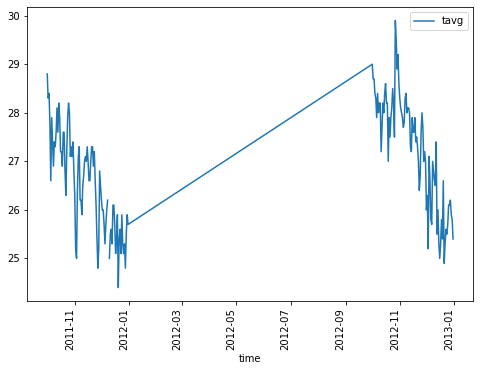

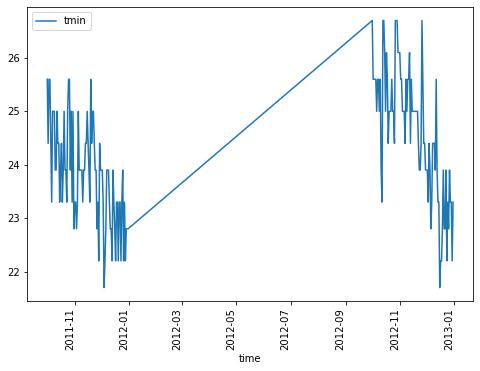

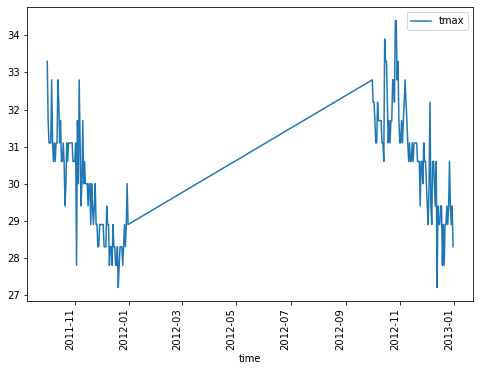

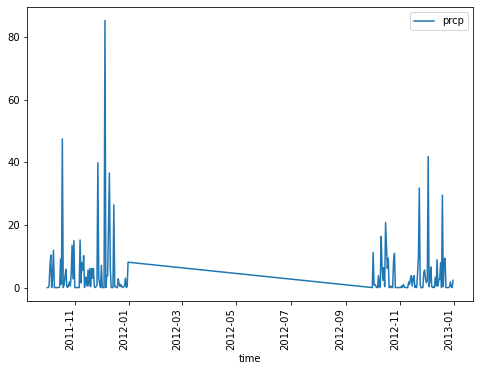

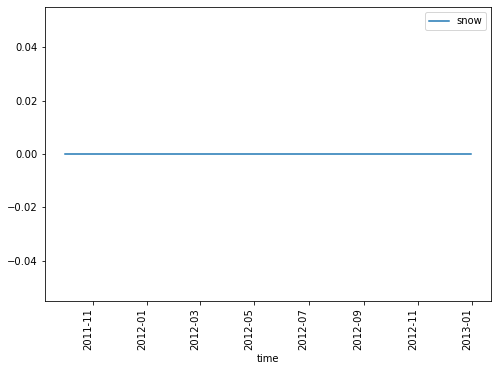

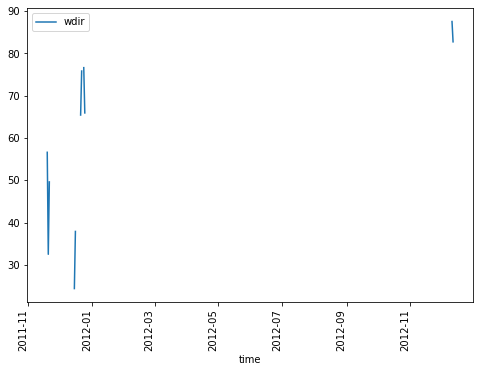

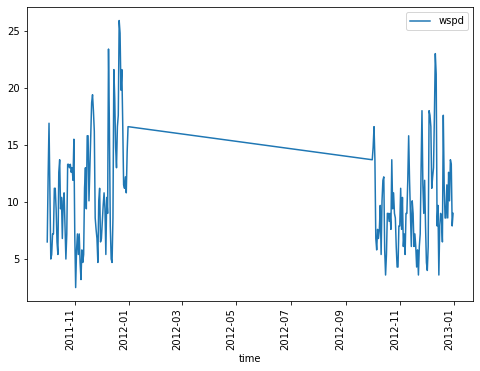

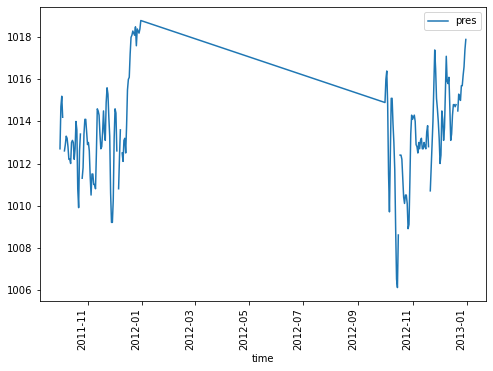

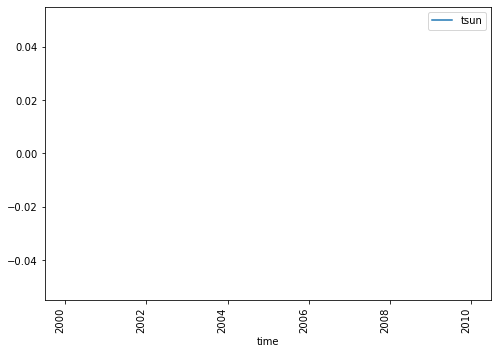

In [10]:
column_list = weather_df.columns
for col in column_list[2:]:
    weather_df[weather_df['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

In [ ]:
# good to work with temperature and windspeed
# maybe perspiration

column_list = ['tavg', 'wspd', 'prcp']
for col in column_list:
    weather_df[weather_df['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

In [12]:
display(stations_dict)
# create a list of airports ordered by the course of the hurricane
ordered_airports = ['TJSJ', 'KMIA', 'KPHL', 'KJFK', 'KEWR', 'KBOS']

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

In [ ]:
# plot only the average temperature for all airports
for airport in ordered_airports:
    weather_df[weather_df['icao'] == airport].plot(kind='line', x='time', y='tavg', figsize=(8,6), rot=90)

In [ ]:
# plot only the average temperature for all airports
for airport in ordered_airports:
    weather_df[weather_df['icao'] == airport].plot(kind='line', x='time', y='wspd', figsize=(8,6), rot=90)

In [ ]:
# plot only the average temperature for all airports
for airport in ordered_airports:
    weather_df[weather_df['icao'] == airport].plot(kind='line', x='time', y='prcp', figsize=(8,6), rot=90)

In [ ]:
# wspd and prsp are still interesting

In [33]:
# lets take a look at the weather_df from 20.10 - 5.11
weather_df_15 = weather_df[(weather_df['time'] >= '2012-10-20') & (weather_df['time'] <= '2012-11-5') ]

# and visualize again
column_list = weather_df_15.columns
for col in column_list[2:]:
    weather_df_15[weather_df_15['icao'] == 'TJSJ'].plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

NameError: name 'weather_df' is not defined